In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.ndimage import distance_transform_edt as dst
from Vsi.Vsi import Vsi

In [5]:
#-----load data------------------------------
im = np.load('gross_512.npy')
im1 = np.load('Berea Sandstone.npy')
#-------invert data (void=1, solid=0)--------
im=im+1
im[im==2]=0

im1=im1+1
im1[im1==2]=0

Text(0.5, 1.0, 'Berea SS')

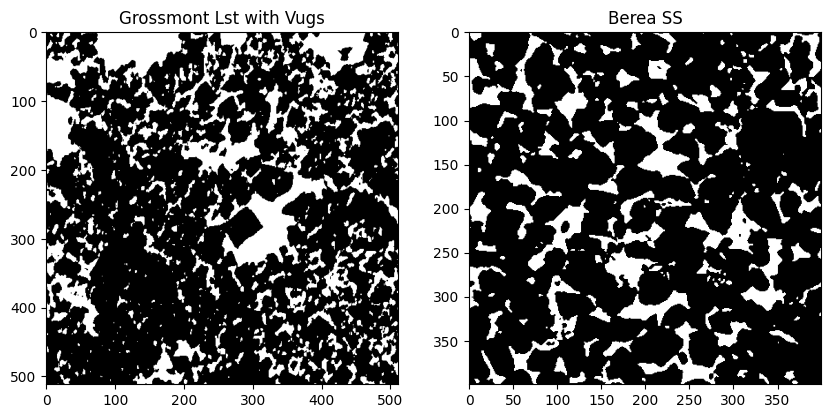

In [9]:
fg,ax = plt.subplots(1,2, figsize=(10,7))
ax[0].imshow(im[300], 'gray')
ax[0].set_title('Grossmont Lst with Vugs')
ax[1].imshow(im1[0], 'gray')
ax[1].set_title('Berea SS')

#### Torquato et. al 2022 Local variance

In [10]:
lv_g = Vsi(im, no_radii=40, no_samples_per_radius=200) # Gambier Lst
lv_b = Vsi(im1, no_radii=40, no_samples_per_radius=200) # Berea SS

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:25<00:00,  1.55it/s]


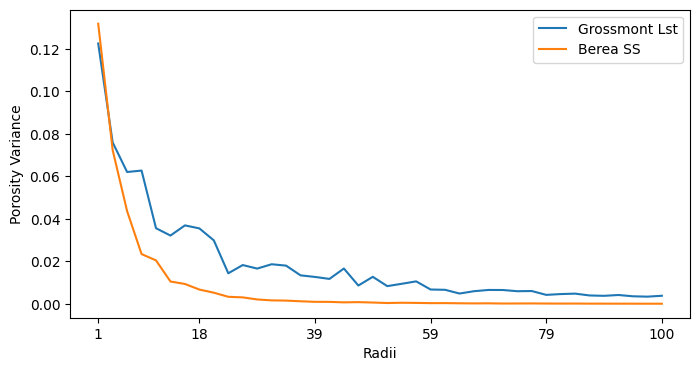

In [11]:
#---plot result----
plt.figure(figsize=(8,4))
lv_g.plot(label='Grossmont Lst',fill=0)
lv_b.plot(label='Berea SS', x_label='Radii', fill=0 , local=True)

### Scale-independent Variance

In [17]:
# distance map of a slice. 
"""To be refined later by runing distance mapping on a representative slice or on a mesh of orthogonal slices"""
ds=dst(im[0]) 
mn_r = ds.max() # maximum width of pores is used as minimum radius for moving windows
mx_r = mn_r+60 

vf = Vsi(im, no_radii=40,
         no_samples_per_radius=200,
         min_radius=mn_r, max_radius=mx_r)

#----same on Berea SS-----------
ds=dst(im1[0])
mn_r = ds.max()
mx_r = mn_r+60
vf1 = Vsi(im1, no_radii=40,
          no_samples_per_radius=200,
          min_radius=mn_r, max_radius=mx_r)


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.53it/s]


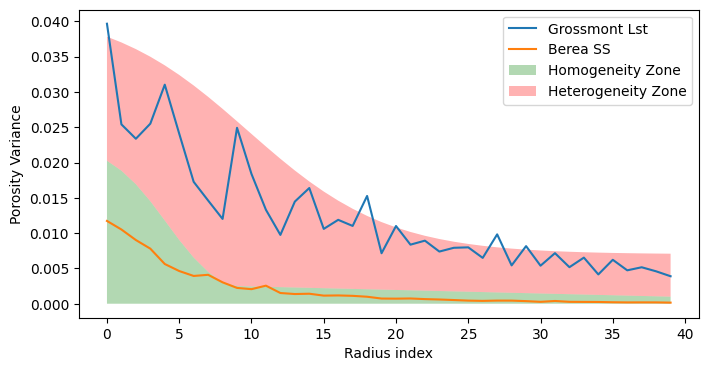

In [18]:
plt.figure(figsize=(8,4))
vf.plot(label='Grossmont Lst',fill=0)
vf1.plot(label='Berea SS', x_label='Radius index')